**Importing libraries**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Immporting boston dataset from sklearn**

In [0]:
from sklearn.datasets import load_boston
bos=load_boston()

In [0]:
bos.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [0]:
## lets check the shape of the dataset first
print('So we have {} rows and {} columns.'.format(bos.data.shape[0],bos.data.shape[1]))


So we have 506 rows and 13 columns.


In [0]:
print('All features:\n','*'*80,'\n',bos.feature_names,'\n','*'*80)

All features:
 ******************************************************************************** 
 ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT'] 
 ********************************************************************************


In [0]:
##I have made research regarding all these features on google. So that I have the understanding what am I doing with them.
print(bos.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
##Lets make a dataframe out of bos
bos_df=pd.DataFrame(bos.data,columns=bos.feature_names)
target=bos.target
bos_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
##Now since we have our data frame we can check the missing value from this
bos_df.isnull().sum() 


'''Its not always true that the missing value value will be in NaN form, here in this data set its in 0. As here you can I dont have any null value'''

bos_df.info()

'''Since every feature is of float type and Except 'CHAS' which has value 0 and 1, if a feature shows a value 0 its high chances that it is a null. Because TAX and PTRATIO can't be zero''' 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


"Since every feature is of float type and Except 'CHAS' which has value 0 and 1, if a feature shows a value 0 its high chances that it is a null. Because TAX and PTRATIO can't be zero"

In [0]:
print('Total null values as 0 in each feature are: \n','*'*50)
for feature in bos.feature_names:
  #print(feature)
  count=0
  for all in bos_df[feature]:
    if all==0:
      count+=1
  print(feature,': ',count)    

Total null values as 0 in each feature are: 
 **************************************************
CRIM :  0
ZN :  372
INDUS :  0
CHAS :  471
NOX :  0
RM :  0
AGE :  0
DIS :  0
RAD :  0
TAX :  0
PTRATIO :  0
B :  0
LSTAT :  0


Now we can see that 'ZN' has 372 0 values and 'CHAS' has 471 null values

In [0]:
## Lets check the percentage of null values in these teo features.

print('ZN has {}% of null values.'.format(372/bos_df.shape[0]))
print('CHAS has {}% of null values.'.format(471/bos_df.shape[0]))

ZN has 0.7351778656126482% of null values.
CHAS has 0.9308300395256917% of null values.


Considering the fact that more than 73% and 93% in these two features are null. So there is no point of keeping these feature in dataset as they  can't be helpful.

In [0]:
## Dropping 'ZN' and 'CHAS'
bos_df.drop(['ZN','CHAS'],axis=1,inplace=True)
bos_df.head()
bos_df.shape

(506, 11)

In [0]:
print('Total null values as 0 in each feature are: \n','*'*50)
for feature in bos_df.columns:
  #print(feature)
  count=0
  for all in bos_df[feature]:
    if all==0:
      count+=1
  print(feature,': ',count)

Total null values as 0 in each feature are: 
 **************************************************
CRIM :  0
INDUS :  0
NOX :  0
RM :  0
AGE :  0
DIS :  0
RAD :  0
TAX :  0
PTRATIO :  0
B :  0
LSTAT :  0


Now we can see that we have pretty much clean data now 

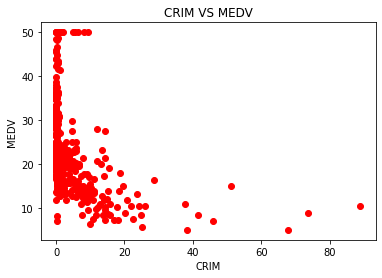

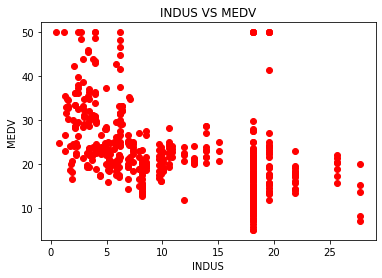

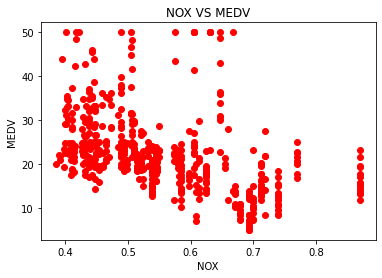

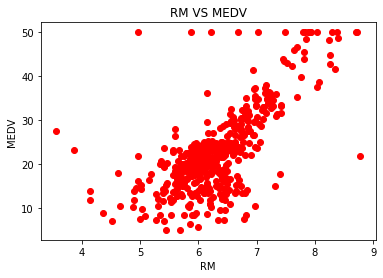

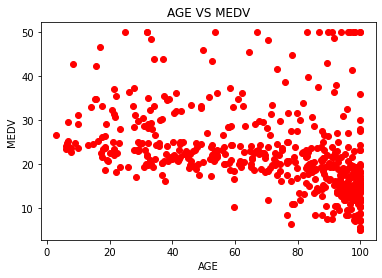

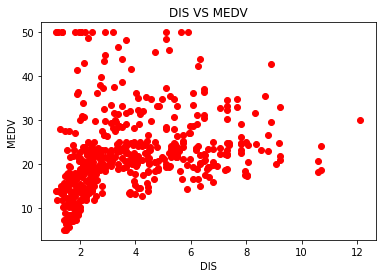

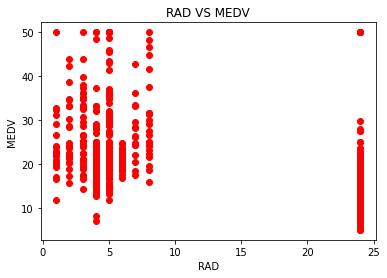

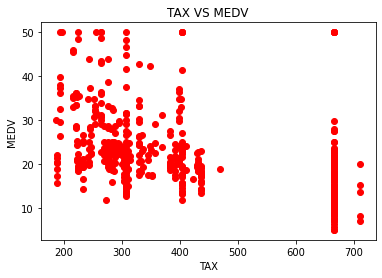

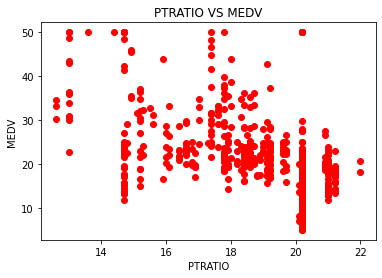

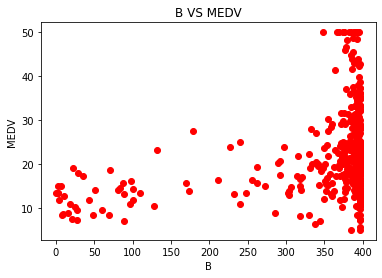

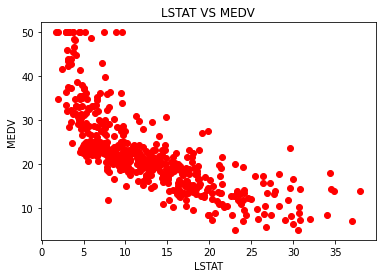

In [0]:
for col in bos_df.columns:
  plt.scatter(bos_df[col],target,c='r')
  plt.xlabel(col)
  plt.ylabel('MEDV')
  plt.title(col+str(' VS MEDV'))
  plt.show()

By observing these univariate visualization I can only deduce that 'RM','AGE' and 'LSTAT' has strong relations with the target value MEDV.

Now we can go for subplots and then  correlation matrix for checking is there any relationship among among feauture.

Since we know that if any two feautures are corelated among themselves we can reduced performance.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


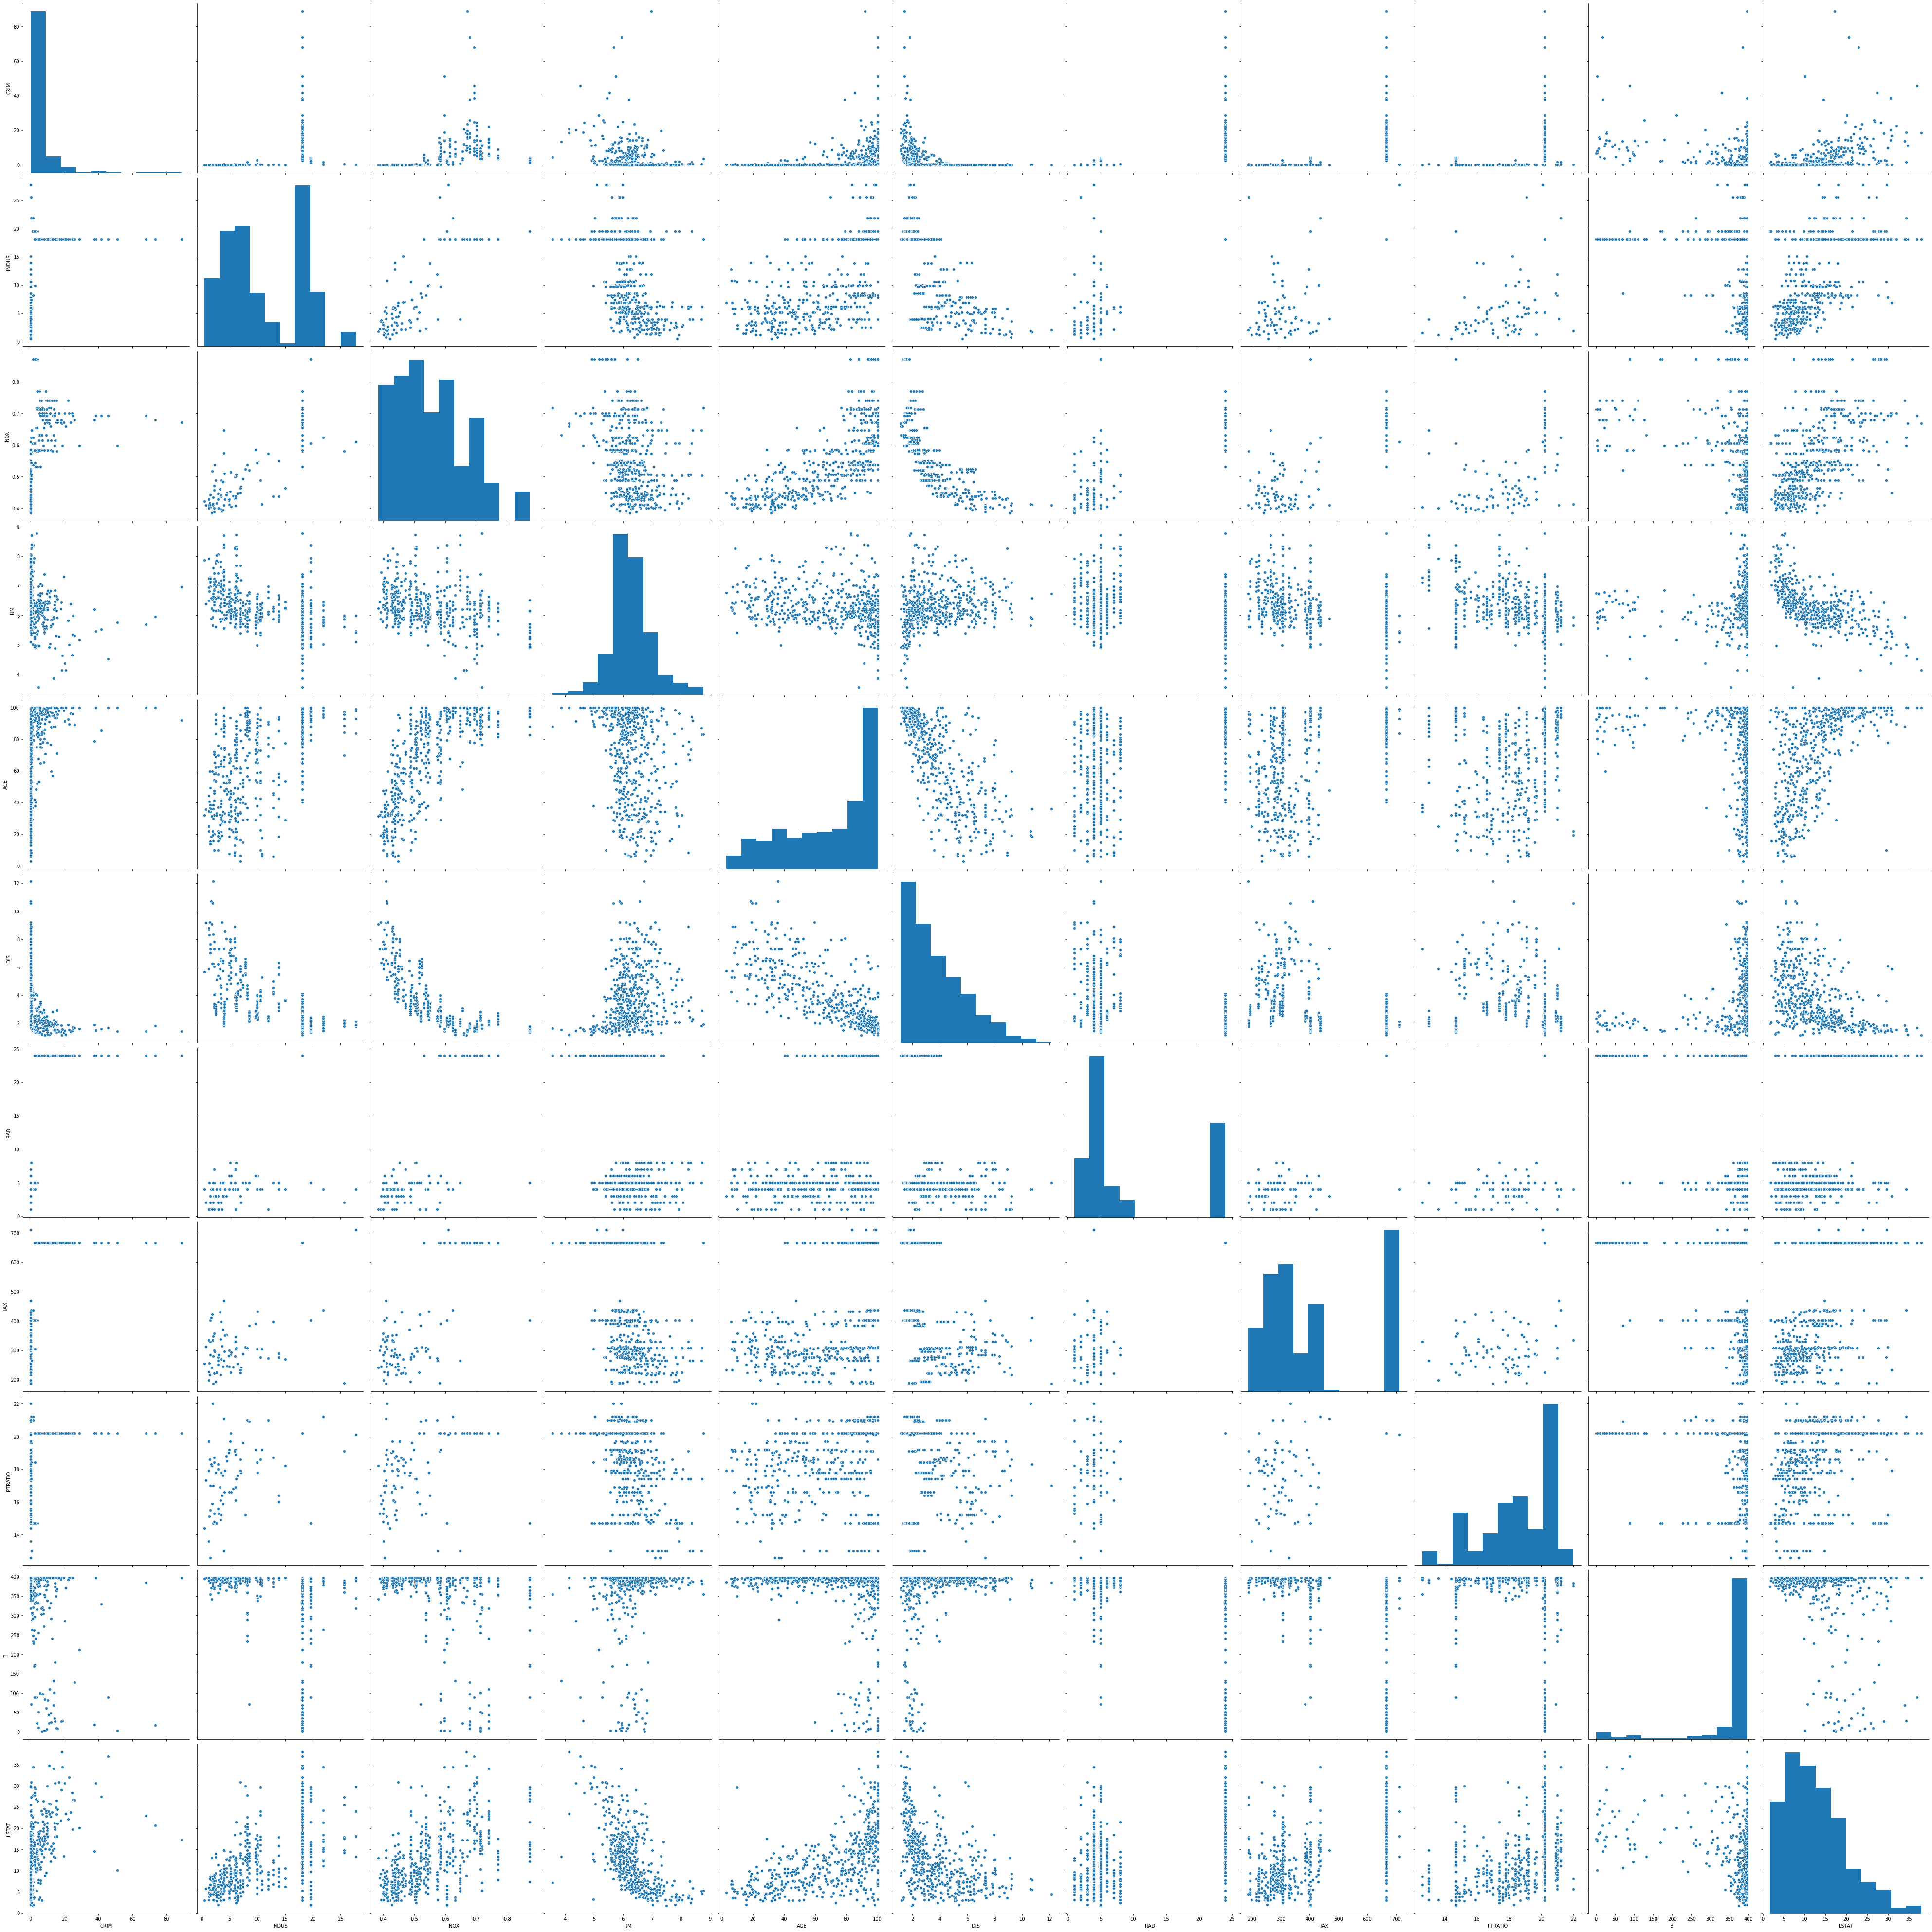

In [0]:
sns.pairplot(bos_df,size=5)
plt.show()

Due to more column numbers its not easy to visualize pairplots so we will use  correlation matrix

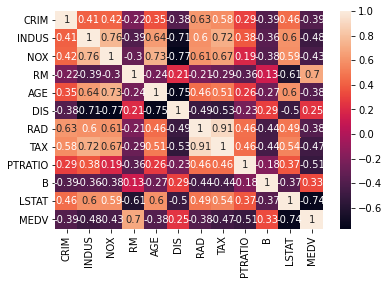

In [0]:
bos_df_new=bos_df
bos_df_new['MEDV']=target
corr=bos_df_new.corr()
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,annot=True)

if values are closer to +1 then they are directly related if they are closer to -1 then they are indirectly related.

**We can clearly see that RM has +0.7 and LSTAT has -0.74 corr score which is same as what we inferred from the univariate analysis.**

One most important thing to notice that is RAD an TAX are highly related. And its very much obvious as more the employment more will the taxx paid.

So TAX and RAD can be combined or any one of them can be dropped.

In [0]:
bos_new=bos_df.drop('RAD',axis=1) ## I am dropping RAD because from corr matrix we can see that TAX is more related to Target column which is MEDV. 

In [0]:
bos_new.columns

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B',
       'LSTAT', 'MEDV'],
      dtype='object')

# **Now lets analyse the outliers**

PLotting boxplot and guassian plot analysing outliers 

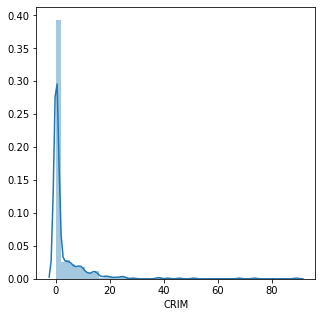

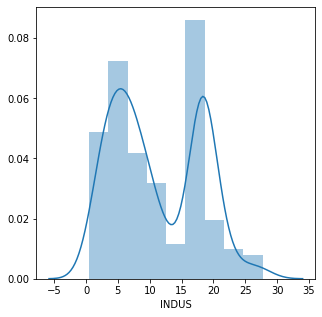

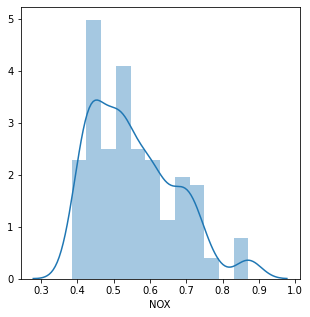

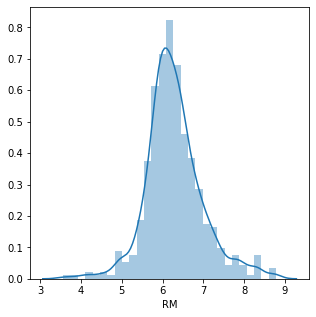

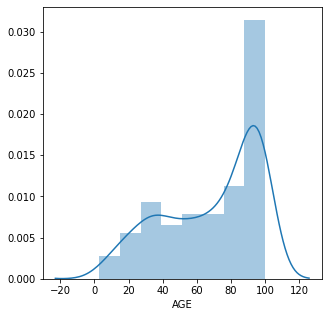

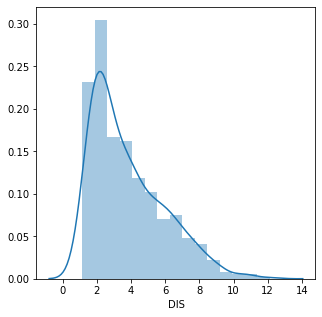

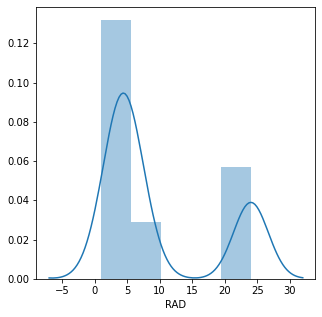

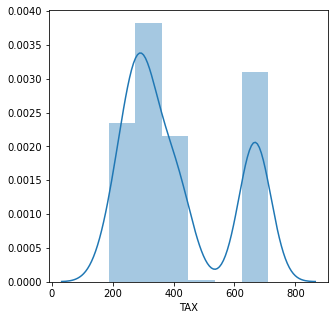

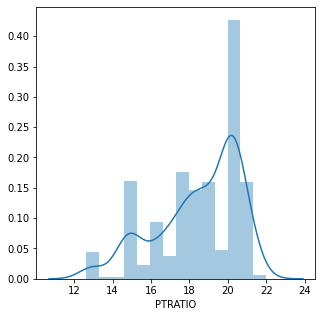

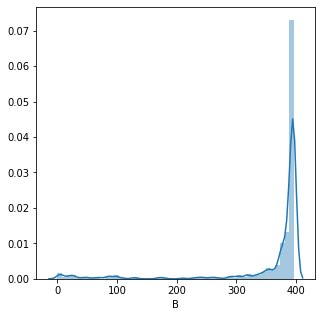

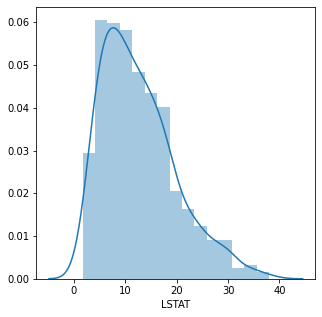

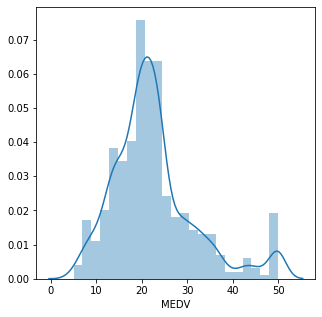

In [0]:
for col in bos_df_new:

  plt.figure(figsize=(5,5))
  sns.distplot(bos_df_new[col])
  plt.show()

In [0]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(bos_df)
data=scaler.transform(bos_df)

In [0]:
bos_df_std=pd.DataFrame(data,columns=bos_df.columns)
bos_df_std.head()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,-1.287909,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.593381,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-1.306878,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-1.306878,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503


# Applying Linear Regression

In [0]:

from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
X_tr,X_test,y_tr,y_test=train_test_split(bos_df_std,target,test_size=0.25,random_state=15)
model=LR()
model.fit(X_tr,y_tr)
prediction=model.predict(X_test)
mse=MSE(y_test,prediction)
r2=R2(y_test,prediction)
print('MSE score:',mse)
print('r_squared value: ',r2)



MSE score: 8.085513703355835e-29
r_squared value:  1.0
